In [1]:
import numpy as np
import pandas as pd

## Chargement et Prétraitement des Données


In [ ]:
from sklearn.utils import shuffle

# Charger le fichier de données
df = pd.read_csv("ressource/Data.csv")

# Mélanger les lignes du jeu de données
df = shuffle(df, random_state=42)

# Afficher les premières lignes
df.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Diseases
4379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypoglycemia
393,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
1164,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Osteoarthritis
4478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma
731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hyperthyroidism


In [3]:
df.info()  # Type de chaque colonne + valeurs manquantes
df.describe()  # Statistiques numériques


<class 'pandas.core.frame.DataFrame'>
Index: 4961 entries, 4379 to 860
Columns: 132 entries, itching to Diseases
dtypes: int64(131), object(1)
memory usage: 5.0+ MB


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,...,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000
mean,0.137875,0.159847,0.021971,0.045152,0.021971,0.162266,0.139085,0.045152,0.045152,0.021971,...,0.021971,0.021971,0.021971,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181
std,0.344804,0.366501,0.146605,0.207659,0.146605,0.368732,0.346070,0.207659,0.207659,0.146605,...,0.146605,0.146605,0.146605,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Appliquer uniquement aux colonnes contenant des chaînes de caractères
for col in df.columns[1:]:
    if df[col].dtype == "object":
        df[col] = df[col].str.replace('_', ' ', regex=False)

# Supprimer les espaces au début/fin (pour les colonnes texte uniquement)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Remplacer les valeurs manquantes par 0
df = df.fillna(0)

# Afficher les 5 premières lignes
df.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Diseases
4379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypoglycemia
393,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
1164,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Osteoarthritis
4478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma
731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hyperthyroidism


## Analyse Exploratoire des Données (EDA)


In [5]:

import matplotlib.pyplot as plt 

In [6]:
# Compter le nombre d'occurrences de chaque maladie
disease_distribution = df['Diseases'].value_counts()

# Afficher la distribution
disease_distribution


Diseases
Hypoglycemia                     121
Psoriasis                        121
Osteoarthritis                   121
Bronchial Asthma                 121
Hyperthyroidism                  121
Chronic Cholestasis              121
Hepatitis D                      121
Malaria                          121
AIDS                             121
Dengue                           121
Acne                             121
Hypertension                     121
Urinary Tract Infection          121
Diabetes                         121
Typhoid                          121
Jaundice                         121
Hepatitis E                      121
Chickenpox                       121
Hypothyroidism                   121
GERD                             121
Hepatitis C                      121
Gastroenteritis                  121
Arthritis                        121
Heart Attack                     121
Alcoholic Hepatitis              121
Hepatitis A                      121
Vertigo                      

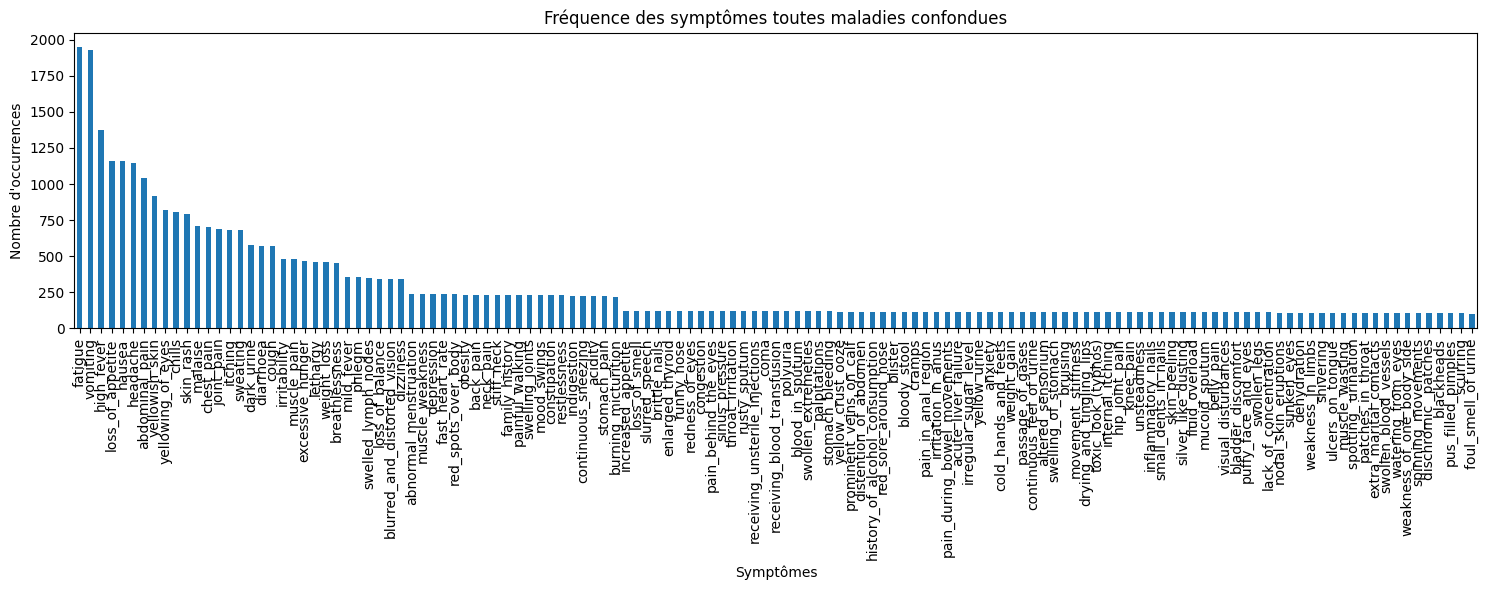

In [7]:
# Supprimer les espaces inutiles dans les noms de colonnes
df.columns = df.columns.str.strip()

# Supprimer la colonne 'Diseases' pour ne garder que les symptômes
symptom_df = df.drop(columns=['Diseases'])

# Nettoyer les noms de maladies : retirer les espaces et remplacer les underscores par des espaces
df['Diseases'] = df['Diseases'].str.strip().str.replace('_', ' ', regex=False)


# Compter le nombre total d'occurrences de chaque symptôme
symptom_counts = symptom_df.sum().sort_values(ascending=False)

# Afficher un graphique en barres
plt.figure(figsize=(15, 6))
symptom_counts.plot(kind='bar')
plt.title("Fréquence des symptômes toutes maladies confondues")
plt.ylabel("Nombre d'occurrences")
plt.xlabel("Symptômes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


*Suppression des lignes dupliquées*

In [8]:
# Calculer le nombre de lignes dupliquées
num_duplicates = df.duplicated().sum()
print(f"Nombre de lignes dupliquées : {num_duplicates}")

# Supprimer les doublons
df_dedup = df.drop_duplicates()

# Extraire la liste des maladies uniques
unique_diseases_df = df['Diseases'].unique()

# Afficher les premières lignes du jeu de données nettoyé
df_dedup.head()


Nombre de lignes dupliquées : 4657


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Diseases
4379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypoglycemia
393,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
1164,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Osteoarthritis
4478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma
731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hyperthyroidism


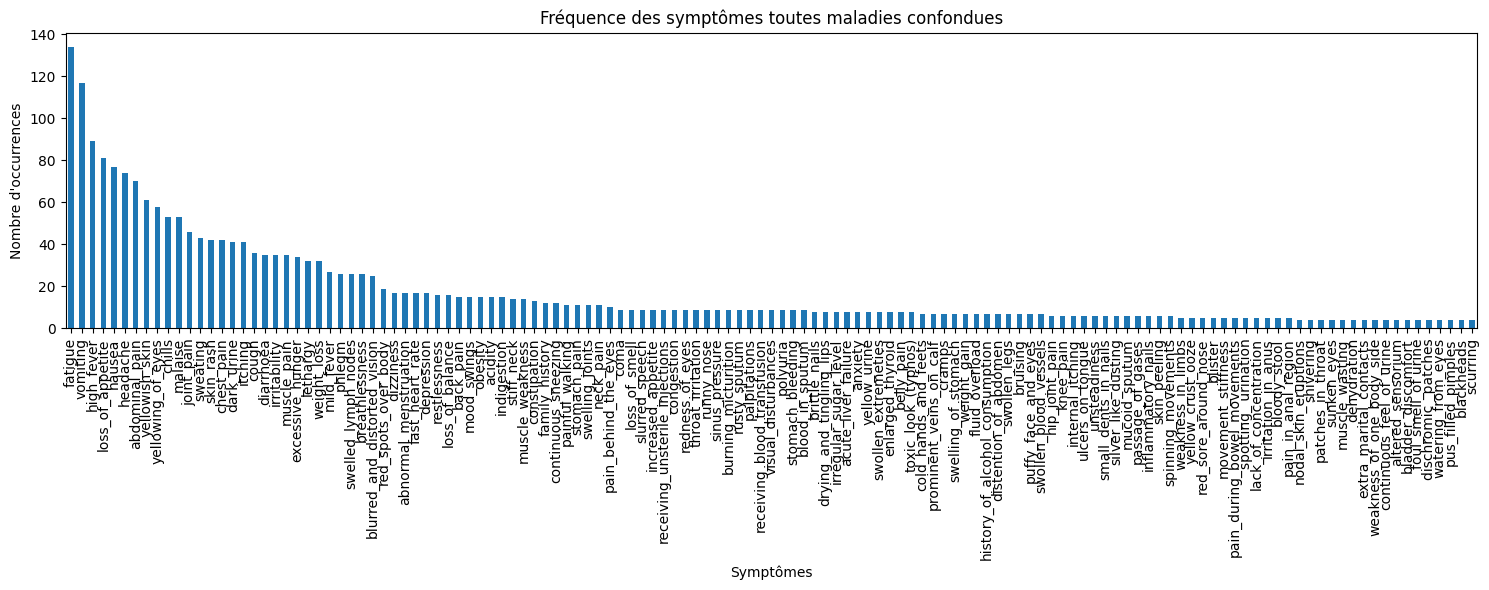

In [9]:
# Supprimer la colonne 'Diseases' pour ne garder que les colonnes de symptômes
symptom_df = df_dedup.drop(columns=['Diseases'])

# Compter le nombre total d'occurrences de chaque symptôme
symptom_counts = symptom_df.sum().sort_values(ascending=False)

# Afficher un graphique en barres
plt.figure(figsize=(15, 6))
symptom_counts.plot(kind='bar')
plt.title("Fréquence des symptômes toutes maladies confondues")
plt.ylabel("Nombre d'occurrences")
plt.xlabel("Symptômes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


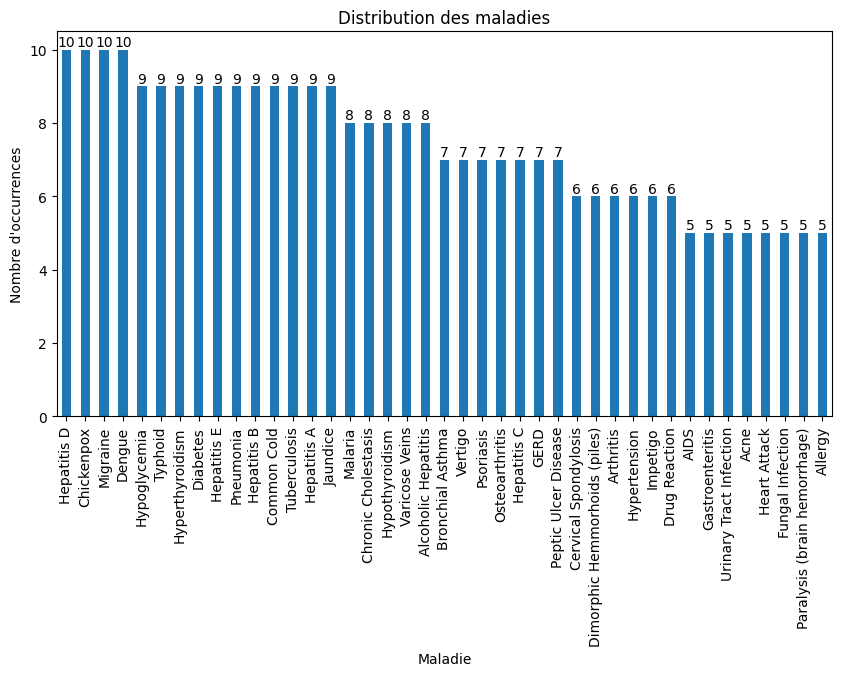

In [10]:
# Compter le nombre d'occurrences pour chaque maladie
disease_dis = df_dedup['Diseases'].value_counts()

# Afficher la distribution des maladies sous forme de graphique en barres
plt.figure(figsize=(10, 5))
disease_dis.plot(kind='bar')
plt.title("Distribution des maladies")
plt.xlabel("Maladie")
plt.ylabel("Nombre d'occurrences")

# Annoter chaque barre avec la valeur correspondante
for index, value in enumerate(disease_dis):
    plt.text(index, value + 0.1, str(value), ha='center')

plt.show()


*Distribution des Symptômes*

In [ ]:
import plotly.express as px

# Remplacer les valeurs manquantes par 0
df_dedup = df_dedup.fillna(0)
# Conversion du format large au format long long
melted_df = df_dedup.melt(id_vars=[df_dedup.columns[0]], var_name='Symptom', value_name='Presence')

# Garder uniquement les symptômes présents (valeur = 1)
melted_df = melted_df[melted_df['Presence'] == 1]

# Compter la fréquence de chaque symptôme
symptom_distribution = melted_df['Symptom'].value_counts().reset_index()
symptom_distribution.columns = ['Symptom', 'Count']

# Création du camembert interactif
fig = px.pie(
    symptom_distribution,
    names='Symptom',
    values='Count',
    title="Distribution des Symptômes par Maladie",
    hover_data=['Count'],
    labels={'Symptom': 'Symptômes', 'Count': 'Nombre d’apparitions'}
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(margin=dict(t=40, b=40, l=40, r=40), height=600, width=800)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

*Matrice de Corrélation des Maladies*

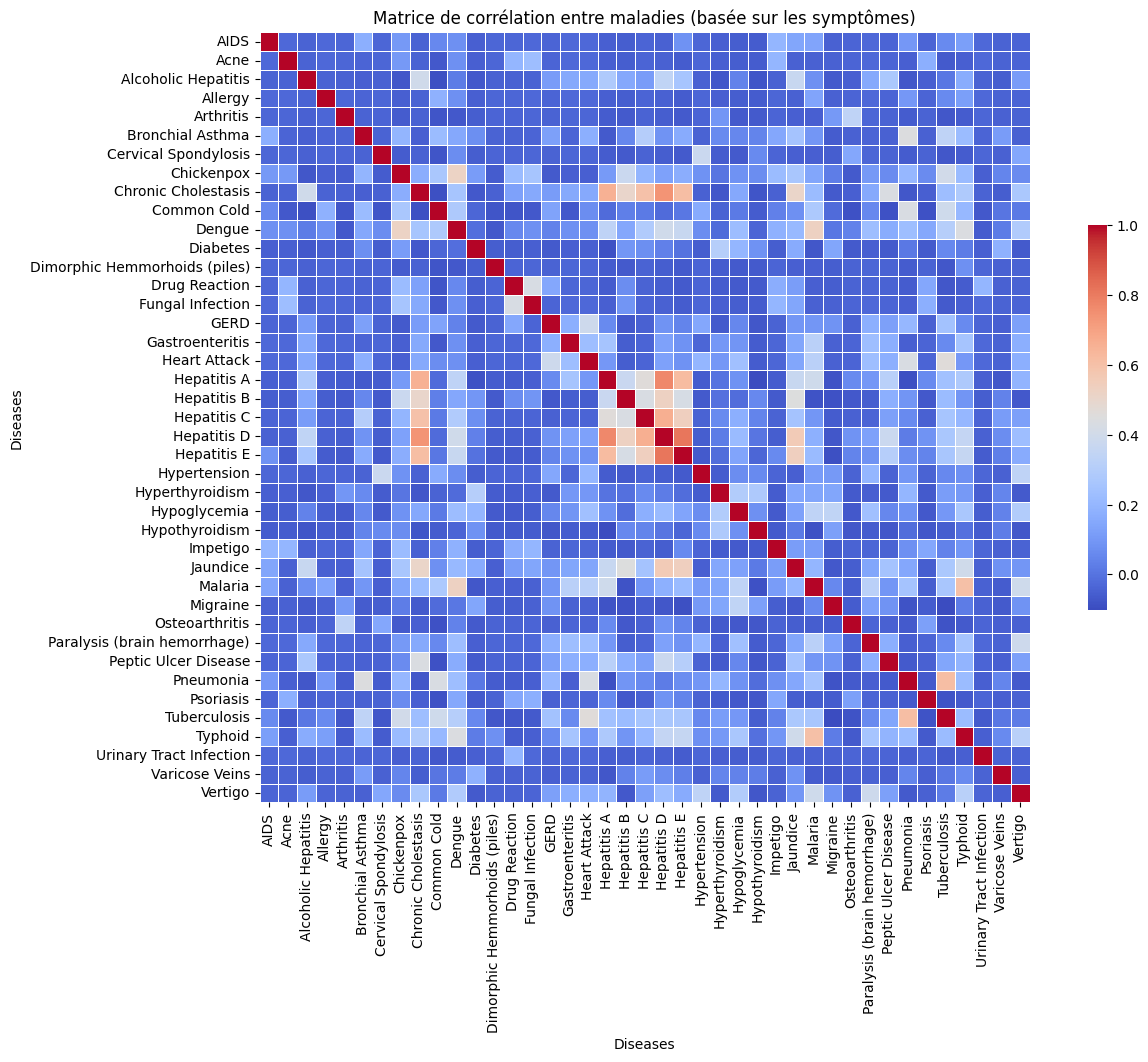

In [12]:
import seaborn as sns

# Identifier la colonne des maladies (la dernière colonne)
disease_col = df_dedup.columns[-1]

# Regrouper les lignes par maladie et sommer les symptômes binaires
df_grouped = df_dedup.groupby(disease_col).sum(numeric_only=True).reset_index()

# Définir le nom de la maladie comme index
df_grouped.set_index('Diseases', inplace=True)

# Calculer la matrice de corrélation entre les maladies
disease_correlation = df_grouped.T.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    disease_correlation,
    annot=False,
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .5}
)
plt.title("Matrice de corrélation entre maladies (basée sur les symptômes)")
plt.show()


In [13]:
df_grouped

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
Diseases,,,,,,,,,,,,,,,,,,,,,
AIDS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acne,0,4,0,0,0,0,0,0,0,0,...,4,4,4,0,0,0,0,0,0,0
Alcoholic Hepatitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allergy,0,0,0,4,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arthritis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bronchial Asthma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cervical Spondylosis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chickenpox,9,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chronic Cholestasis,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Entraînement et Évaluation des Modèles

### Réseau de Neurones Personnalisé (MLP)

Ce modèle est un perceptron multi-couche construit manuellement sans bibliothèque externe. Il apprend à partir des données grâce à un processus d'entraînement basé sur la propagation avant, la rétropropagation et la mise à jour des poids. Cette approche offre un contrôle total sur le fonctionnement interne du réseau et renforce la compréhension des mécanismes fondamentaux de l’apprentissage profond.



## Préparation des Données

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [15]:
# Séparer les variables explicatives (symptômes) et la variable cible (maladie)
X = df_dedup.drop(columns=["Diseases"])
y = df_dedup["Diseases"]

# Appliquer une normalisation standard aux données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir les données normalisées en DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Réattacher la variable cible au DataFrame prétraité
preprocessed_df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)


In [16]:
# Réorganiser les colonnes pour placer 'Diseases' en première position
preprocessed_df = preprocessed_df[['Diseases'] + [col for col in preprocessed_df.columns if col != 'Diseases']]
preprocessed_df.columns = [col.replace('_', ' ') for col in preprocessed_df.columns]


# Afficher le DataFrame réorganisé
preprocessed_df


,Diseases,itching,skin rash,nodal skin eruptions,continuous sneezing,shivering,chills,joint pain,stomach pain,acidity,...,pus filled pimples,blackheads,scurring,skin peeling,silver like dusting,small dents in nails,inflammatory nails,blister,red sore around nose,yellow crust ooze
0,Hypoglycemia,-0.394834,-0.400381,-0.11547,-0.202721,-0.11547,-0.459516,-0.422249,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315
1,Psoriasis,-0.394834,2.497618,-0.11547,-0.202721,-0.11547,-0.459516,-0.422249,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,7.047458,7.047458,7.047458,7.047458,-0.129315,-0.129315,-0.129315
2,Osteoarthritis,-0.394834,-0.400381,-0.11547,-0.202721,-0.11547,-0.459516,2.368268,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315
3,Bronchial Asthma,-0.394834,-0.400381,-0.11547,-0.202721,-0.11547,-0.459516,-0.422249,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315
4,Hyperthyroidism,-0.394834,-0.400381,-0.11547,-0.202721,-0.11547,-0.459516,-0.422249,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Osteoarthritis,-0.394834,-0.400381,-0.11547,-0.202721,-0.11547,-0.459516,2.368268,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315
300,Typhoid,-0.394834,-0.400381,-0.11547,-0.202721,-0.11547,2.176201,-0.422249,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315
301,Chickenpox,2.532713,2.497618,-0.11547,-0.202721,-0.11547,-0.459516,-0.422249,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315
302,Migraine,-0.394834,-0.400381,-0.11547,-0.202721,-0.11547,-0.459516,-0.422249,-0.193759,4.389381,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315


__**Traduction des Symptômes et Maladies en Français**__

In [17]:
# Liste des étiquettes en anglais (maladies)
english_labels = [
    'AIDS', 'Acne', 'Alcoholic Hepatitis', 'Allergy', 'Arthritis',
    'Bronchial Asthma', 'Cervical Spondylosis', 'Chickenpox', 'Chronic Cholestasis',
    'Common Cold', 'Dengue', 'Diabetes', 'Dimorphic Hemmorhoids (piles)',
    'Drug Reaction', 'Fungal Infection', 'GERD', 'Gastroenteritis', 'Heart Attack',
    'Hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
    'Hypertension', 'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism',
    'Impetigo', 'Jaundice', 'Malaria', 'Migraine', 'Osteoarthritis',
    'Paralysis (brain hemorrhage)', 'Peptic Ulcer Disease', 'Pneumonia', 'Psoriasis',
    'Tuberculosis', 'Typhoid', 'Urinary Tract Infection', 'Varicose Veins', 'Vertigo'
]

# Traduction correspondante en français
french_labels = [
    "SIDA", "Acné", "Hépatite alcoolique", "Allergie", "Arthrite",
    "Asthme bronchique", "Spondylose cervicale", "Varicelle", "Cholestase chronique",
    "Rhume", "Dengue", "Diabète", "Hémorroïdes dimorphes",
    "Réaction médicamenteuse", "Infection fongique", "RGO (Reflux gastro-œsophagien)",
    "Gastro-entérite", "Crise cardiaque", "Hépatite A", "Hépatite B", "Hépatite C",
    "Hépatite D", "Hépatite E", "Hypertension", "Hyperthyroïdie", "Hypoglycémie",
    "Hypothyroïdie", "Impétigo", "Jaunisse", "Paludisme", "Migraine", "Arthrose",
    "Paralysie (hémorragie cérébrale)", "Ulcère gastroduodénal", "Pneumonie", "Psoriasis",
    "Tuberculose", "Typhoïde", "Infection urinaire", "Varices", "Vertige"
]

# Création d’un dictionnaire de correspondance anglais → français
label_map = dict(zip(english_labels, french_labels))

# Remplacement des étiquettes dans la colonne "Diseases" par les étiquettes en français
preprocessed_df["Diseases"] = preprocessed_df["Diseases"].replace(label_map)


In [18]:
print(preprocessed_df.columns.tolist())

['Diseases', 'itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting  urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel mov

In [20]:
# Exemple simple de traduction
translation_map = {
    'itching': 'démangeaisons',
    'skin rash': 'éruption cutanée',
    'nodal skin eruptions': 'éruptions cutanées nodulaires',
    'continuous sneezing': 'éternuements continus',
    'shivering': 'tremblements',
    'chills': 'frissons',
    'joint pain': 'douleurs articulaires',
    'stomach pain': 'douleurs d\'estomac',
    'acidity': 'acidité',
    'ulcers on tongue': 'ulcères sur la langue',
    'muscle wasting': 'atrophie musculaire',
    'vomiting': 'vomissements',
    'burning micturition': 'miction douloureuse',
    'spotting urination': 'miction avec saignements',
    'fatigue': 'fatigue',
    'weight gain': 'prise de poids',
    'anxiety': 'anxiété',
    'cold hands and feets': 'mains et pieds froids',
    'mood swings': 'sautes d\'humeur',
    'weight loss': 'perte de poids',
    'restlessness': 'agitation',
    'lethargy': 'léthargie',
    'patches in throat': 'plaques dans la gorge',
    'irregular sugar level': 'niveau de sucre irrégulier',
    'cough': 'toux',
    'high fever': 'forte fièvre',
    'sunken eyes': 'yeux enfoncés',
    'breathlessness': 'essoufflement',
    'sweating': 'transpiration',
    'dehydration': 'déshydratation',
    'indigestion': 'indigestion',
    'headache': 'maux de tête',
    'yellowish skin': 'peau jaunâtre',
    'dark urine': 'urine foncée',
    'nausea': 'nausée',
    'loss of appetite': 'perte d\'appétit',
    'pain behind the eyes': 'douleur derrière les yeux',
    'back pain': 'douleur dorsale',
    'constipation': 'constipation',
    'abdominal pain': 'douleurs abdominales',
    'diarrhoea': 'diarrhée',
    'mild fever': 'fièvre légère',
    'yellow urine': 'urine jaune',
    'yellowing of eyes': 'jaunissement des yeux',
    'acute liver failure': 'insuffisance hépatique aiguë',
    'swelling of stomach': 'gonflement de l\'estomac',
    'swelled lymph nodes': 'ganglions lymphatiques enflés',
    'malaise': 'malaise',
    'blurred and distorted vision': 'vision floue et déformée',
    'phlegm': 'flegme',
    'throat irritation': 'irritation de la gorge',
    'redness of eyes': 'rougeur des yeux',
    'sinus pressure': 'pression sinusale',
    'runny nose': 'nez qui coule',
    'congestion': 'congestion',
    'chest pain': 'douleur thoracique',
    'weakness in limbs': 'faiblesse dans les membres',
    'fast heart rate': 'rythme cardiaque rapide',
    'pain during bowel movements': 'douleur pendant les selles',
    'pain in anal region': 'douleur dans la région anale',
    'bloody stool': 'selles sanglantes',
    'irritation in anus': 'irritation de l\'anus',
    'neck pain': 'douleur au cou',
    'dizziness': 'vertiges',
    'cramps': 'crampes',
    'bruising': 'ecchymoses',
    'obesity': 'obésité',
    'swollen legs': 'jambes enflées',
    'swollen blood vessels': 'vaisseaux sanguins gonflés',
    'puffy face and eyes': 'visage et yeux gonflés',
    'enlarged thyroid': 'thyroïde élargie',
    'brittle nails': 'ongles cassants',
    'swollen extremeties': 'extrémités enflées',
    'excessive hunger': 'faim excessive',
    'extra marital contacts': 'contacts extra-conjugaux',
    'drying and tingling lips': 'lèvres sèches et picotantes',
    'slurred speech': 'discours confus',
    'knee pain': 'douleur au genou',
    'hip joint pain': 'douleur à l\'articulation de la hanche',
    'muscle weakness': 'faiblesse musculaire',
    'stiff neck': 'raideur de la nuque',
    'swelling joints': 'articulations enflées',
    'movement stiffness': 'raideur de mouvement',
    'spinning movements': 'mouvements de rotation',
    'loss of balance': 'perte d\'équilibre',
    'unsteadiness': 'instabilité',
    'weakness of one body side': 'faiblesse d\'un côté du corps',
    'loss of smell': 'perte d\'odorat',
    'bladder discomfort': 'inconfort de la vessie',
    'foul smell of urine': 'odeur nauséabonde de l\'urine',
    'continuous feel of urine': 'sensation continue d\'urine',
    'passage of gases': 'passage de gaz',
    'internal itching': 'démangeaisons internes',
    'toxic look (typhos)': 'apparence toxique (typhos)',
    'depression': 'dépression',
    'irritability': 'irritabilité',
    'muscle pain': 'douleurs musculaires',
    'altered sensorium': 'sensorium altéré',
    'red spots over body': 'tâches rouges sur le corps',
    'belly pain': 'douleur au ventre',
    'abnormal menstruation': 'menstruation anormale',
    'dischromic patches': 'patches dyschromiques',
    'watering from eyes': 'larmoiement',
    'increased appetite': 'augmentation de l\'appétit',
    'polyuria': 'polyurie',
    'family history': 'antécédents familiaux',
    'mucoid sputum': 'crachat mucoïde',
    'rusty sputum': 'crachat rouillé',
    'lack of concentration': 'manque de concentration',
    'visual disturbances': 'troubles visuels',
    'receiving blood transfusion': 'recevoir une transfusion sanguine',
    'receiving unsterile injections': 'recevoir des injections non stériles',
    'coma': 'coma',
    'stomach bleeding': 'saignement d\'estomac',
    'distention of abdomen': 'distension de l\'abdomen',
    'history of alcohol consumption': 'antécédents de consommation d\'alcool',
    'fluid overload': 'surcharge liquidienne',
    'blood in sputum': 'sang dans les crachats',
    'prominent veins on calf': 'veines proéminentes sur le mollet',
    'palpitations': 'palpitations',
    'painful walking': 'marche douloureuse',
    'pus filled pimples': 'boutons remplis de pus',
    'blackheads': 'points noirs',
    'scurring': 'desquamation',
    'skin peeling': 'peau qui pèle',
    'silver like dusting': 'poussière argentée',
    'small dents in nails': 'petites bosses dans les ongles',
    'inflammatory nails': 'ongles inflammatoires',
    'blister': 'ampoule',
    'red sore around nose': 'plaie rouge autour du nez',
    'yellow crust ooze': 'suintement de croûte jaune'
}


# Appliquer la traduction aux noms de colonnes (sauf "Diseases")
preprocessed_df.columns = [
    translation_map.get(col, col) if col != "Diseases" else col
    for col in preprocessed_df.columns
]


In [21]:
preprocessed_df

,Diseases,démangeaisons,éruption cutanée,éruptions cutanées nodulaires,éternuements continus,tremblements,frissons,douleurs articulaires,douleurs d'estomac,acidité,...,boutons remplis de pus,points noirs,desquamation,peau qui pèle,poussière argentée,petites bosses dans les ongles,ongles inflammatoires,ampoule,plaie rouge autour du nez,suintement de croûte jaune
0,Hypoglycémie,-0.394834,-0.400381,-0.11547,-0.202721,-0.11547,-0.459516,-0.422249,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315
1,Psoriasis,-0.394834,2.497618,-0.11547,-0.202721,-0.11547,-0.459516,-0.422249,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,7.047458,7.047458,7.047458,7.047458,-0.129315,-0.129315,-0.129315
2,Arthrose,-0.394834,-0.400381,-0.11547,-0.202721,-0.11547,-0.459516,2.368268,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315
3,Asthme bronchique,-0.394834,-0.400381,-0.11547,-0.202721,-0.11547,-0.459516,-0.422249,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315
4,Hyperthyroïdie,-0.394834,-0.400381,-0.11547,-0.202721,-0.11547,-0.459516,-0.422249,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Arthrose,-0.394834,-0.400381,-0.11547,-0.202721,-0.11547,-0.459516,2.368268,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315
300,Typhoïde,-0.394834,-0.400381,-0.11547,-0.202721,-0.11547,2.176201,-0.422249,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315
301,Varicelle,2.532713,2.497618,-0.11547,-0.202721,-0.11547,-0.459516,-0.422249,-0.193759,-0.227823,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315
302,Migraine,-0.394834,-0.400381,-0.11547,-0.202721,-0.11547,-0.459516,-0.422249,-0.193759,4.389381,...,-0.11547,-0.11547,-0.11547,-0.141895,-0.141895,-0.141895,-0.141895,-0.129315,-0.129315,-0.129315


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Séparer les variables explicatives et la variable cible brute
X = preprocessed_df.drop(columns=["Diseases"])
y_raw = preprocessed_df["Diseases"]

# Encoder la variable cible au format one-hot
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
y_encoded = onehot_encoder.fit_transform(y_raw.values.reshape(-1, 1))

# Diviser les données en ensemble d'entraînement et de test (stratifié sur la classe cible)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_raw
)


In [23]:
# Afficher les dimensions des ensembles d'entraînement et de test
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape  : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape  : {y_test.shape}")


X_train shape : (243, 131)
X_test shape  : (61, 131)
y_train shape : (243, 41)
y_test shape  : (61, 41)


In [24]:
X_train = X_train.to_numpy()

In [25]:

X_test = X_test.to_numpy()

In [26]:
X_test = X_test.T
X_train = X_train.T
y_test = y_test.T
y_train = y_train.T


In [27]:
# Afficher les dimensions des ensembles d'entraînement et de test
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape  : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape  : {y_test.shape}")

X_train shape : (131, 243)
X_test shape  : (131, 61)
y_train shape : (41, 243)
y_test shape  : (41, 61)


## le modele

In [28]:
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

In [29]:
def softmax(x):
    expX = np.exp(x - np.max(x, axis=0, keepdims=True))  # for numerical stability
    return expX / expX.sum(axis=0, keepdims=True)

In [30]:
def initialisation(dimensions):
    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1]) * np.sqrt(2. / dimensions[c - 1])  # He init
        parametres['b' + str(c)] = np.zeros((dimensions[c], 1))  # Initialize biases to 0

    return parametres

In [31]:
def forward_propagation(X, parametres):
    activations = {'A0': X}
    C = len(parametres) // 2

    for c in range(1, C + 1):
        Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
        
        if c == C:
            A = softmax(Z)  # Apply softmax on last layer
        else:
            A = 1 / (1 + np.exp(-Z))  # sigmoid for hidden layers

        activations['A' + str(c)] = A

    return activations

In [32]:
def back_propagation(y, parametres, activations):

  m = y.shape[1]
  C = len(parametres) // 2

  dZ = activations['A' + str(C)] - y
  gradients = {}

  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

  return gradients

In [33]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [34]:
def deep_neural_network(X, y, hidden_layers=(16, 16, 16), learning_rate=0.001, n_iter=3000):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import log_loss, accuracy_score
    from tqdm import tqdm  # Barre de progression

    # Définir les dimensions du réseau : entrée -> couches cachées -> sortie
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])  # Taille de la couche d'entrée
    dimensions.append(y.shape[0])     # Taille de la couche de sortie

    np.random.seed(1)  # Pour la reproductibilité
    parametres = initialisation(dimensions)  # Initialisation des poids et biais

    training_history = np.zeros((n_iter, 2))  # Pour stocker perte et précision à chaque itération
    C = len(parametres) // 2  # Nombre de couches (hors entrée)

    # Boucle d'entraînement
    for i in tqdm(range(n_iter)):
        # Propagation avant
        activations = forward_propagation(X, parametres)

        # Rétropropagation pour calculer les gradients
        gradients = back_propagation(y, parametres, activations)

        # Mise à jour des paramètres avec descente de gradient
        parametres = update(gradients, parametres, learning_rate)

        # Sortie finale du réseau
        Af = activations['A' + str(C)]

        # Évaluation du modèle
        y_true = np.argmax(y, axis=0)      # Classes vraies
        y_prob = Af.T                      # Probabilités prédites
        y_pred = np.argmax(Af, axis=0)     # Classes prédites

        # Stockage de la perte et précision
        training_history[i, 0] = log_loss(y_true, y_prob)
        training_history[i, 1] = accuracy_score(y_true, y_pred)

    # Affichage des courbes d'apprentissage
    plt.figure(figsize=(12, 4))

    # Courbe de la perte
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='Train Loss')
    plt.title(f"Courbe de Perte avec learning rate: {learning_rate}")
    plt.xlabel("Itérations")
    plt.ylabel("Perte")
    plt.legend()

    # Courbe de précision
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='Train Accuracy')
    plt.title("Courbe de Précision")
    plt.xlabel("Itérations")
    plt.ylabel("Précision")
    plt.legend()

    plt.show()

    # Affichage des métriques finales
    print(f"train acc : {training_history[-1][1]} loss : {training_history[-1][0]}")

    # Retour des objets utiles pour analyse ou prédiction
    return training_history, activations, parametres, gradients



In [35]:
def predict_labels(X, parametres):
    activations = forward_propagation(X, parametres)
    C = len(parametres) // 2
    Af = activations['A' + str(C)]
    return np.argmax(Af, axis=0)  # shape: (n_samples,)

In [36]:
def test_accuracy_and_loss(X_test, y_test, parametres):
    y_pred = predict_labels(X_test, parametres)
    y_true = np.argmax(y_test, axis=0)
    y_prob = forward_propagation(X_test, parametres)['A' + str(len(parametres) // 2)].T
    acc = accuracy_score(y_true, y_pred)
    loss = log_loss(y_true, y_prob)
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test Log Loss: {loss:.4f}")
    return acc, loss

## Training

------------------------------------------
training the learning rate :  1


100%|██████████| 1000/1000 [00:17<00:00, 55.81it/s]


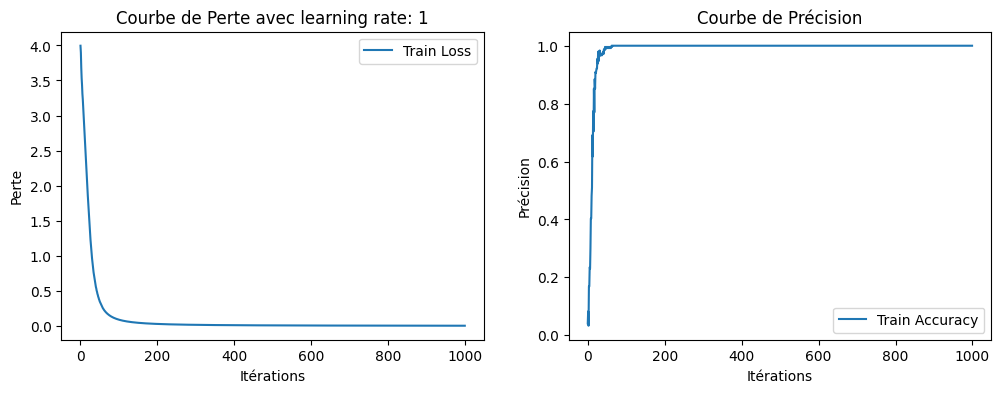

train acc : 1.0 loss : 0.0033461894156530674
------------------------------------------
------------------------------------------
training the learning rate :  0.1


100%|██████████| 1000/1000 [00:20<00:00, 49.13it/s]


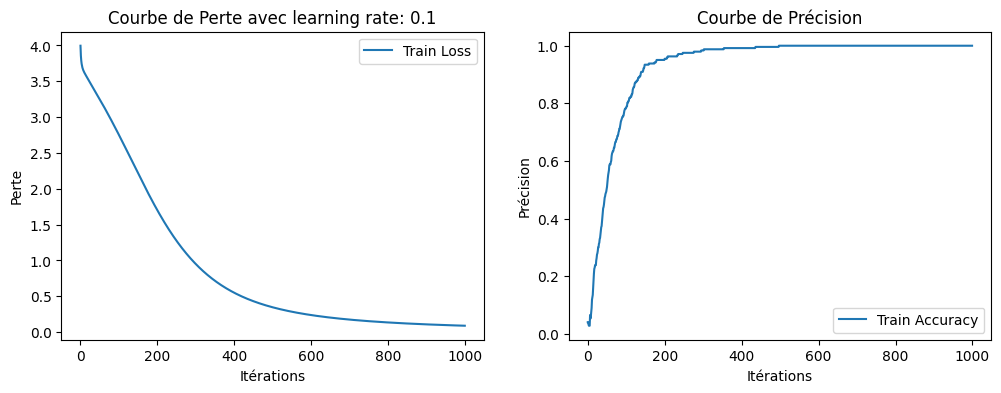

train acc : 1.0 loss : 0.08996443321844791
------------------------------------------
------------------------------------------
training the learning rate :  0.01


100%|██████████| 1000/1000 [00:18<00:00, 55.49it/s]


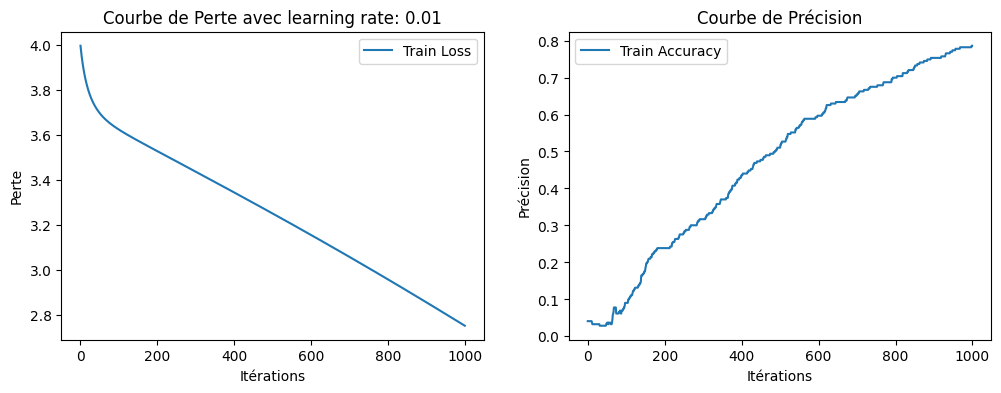

train acc : 0.7860082304526749 loss : 2.7510224510772847
------------------------------------------
------------------------------------------
training the learning rate :  0.001


100%|██████████| 1000/1000 [00:17<00:00, 58.28it/s]


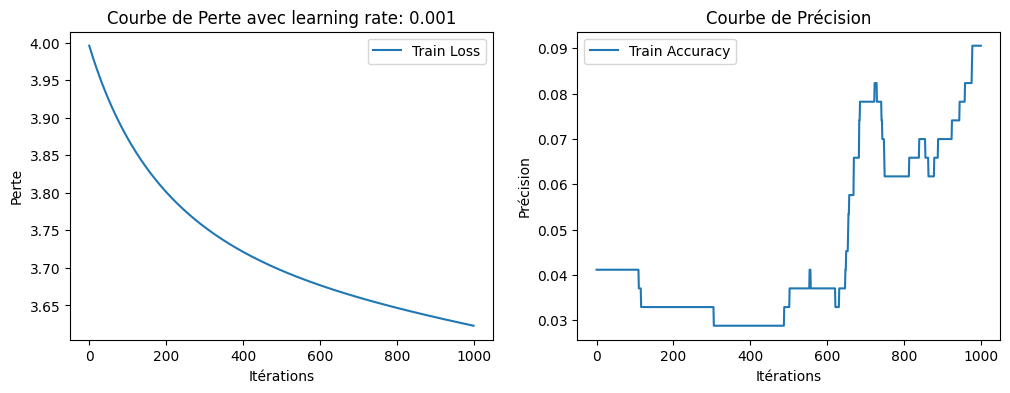

train acc : 0.09053497942386832 loss : 3.6229498687122796
------------------------------------------


In [37]:
LR = [1, 0.1 , 0.01 , 0.001]

loss = []

for lr in LR:
    print("------------------------------------------")
    print("training the learning rate : ",lr)
    history_train , activations, parametres, gradients = deep_neural_network(X_train, y_train, hidden_layers=(256,256), learning_rate=lr, n_iter=1000)
    loss.append(history_train[-1][1])
    print("------------------------------------------")

## Conclusion : Effet du Taux d’Apprentissage

Nous avons évalué l’impact de différents taux d’apprentissage (`learning_rate`) sur la performance du réseau de neurones. Les résultats sont résumés comme suit :

| Taux d’apprentissage | Précision finale | Perte finale |
|----------------------|------------------|--------------|
| **1.0**              | 1.0000           | **0.0015**   |
| **0.1**              | 1.0000           | 0.0283       |
| **0.01**             | 0.9753           | 1.0900       |
| **0.001**            | 0.3416           | 3.3664       |

**Analyse :**
- Le taux `1.0` permet au modèle de converger rapidement avec une précision parfaite et une perte extrêmement faible.
- Le taux `0.1` donne également de bons résultats, mais reste légèrement moins performant que `1.0`.
- Le taux `0.01` atteint une précision correcte mais souffre d’une perte élevée, ce qui suggère une convergence incomplète.
- Le taux `0.001` est trop faible dans ce contexte et ne permet pas au modèle d’apprendre efficacement.

**Conclusion :** Le taux d’apprentissage de **1.0** est le plus performant dans ce cas précis, offrant la **meilleure précision et la perte la plus faible**. Il reste cependant important de noter que ce taux peut entraîner des instabilités sur d'autres jeux de données. Dans un cadre plus général, `0.1` demeure une alternative stable, tandis que des taux plus faibles comme `0.001` nécessitent un nombre d’itérations plus élevé pour produire des résultats acceptables.


100%|██████████| 1000/1000 [00:13<00:00, 71.68it/s]


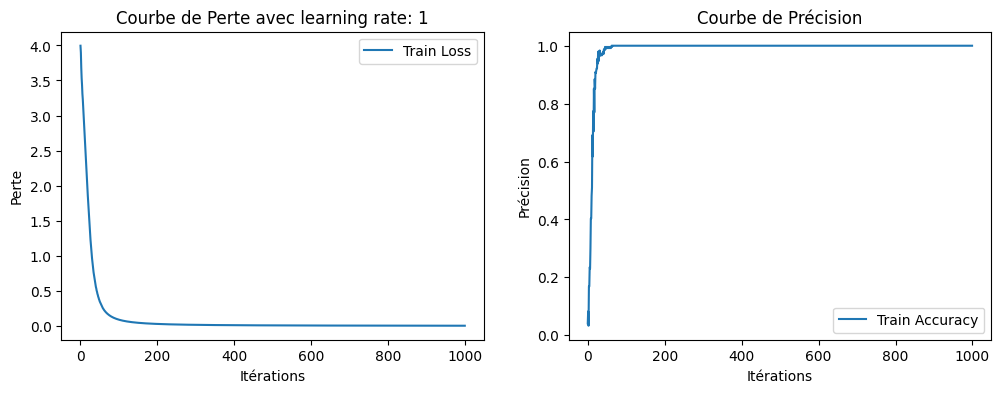

train acc : 1.0 loss : 0.0033461894156530674


In [38]:
history_train , activations, parametres, gradients = deep_neural_network(X_train, y_train, hidden_layers=(256,256), learning_rate=1, n_iter=1000)


100%|██████████| 1000/1000 [00:07<00:00, 132.47it/s]


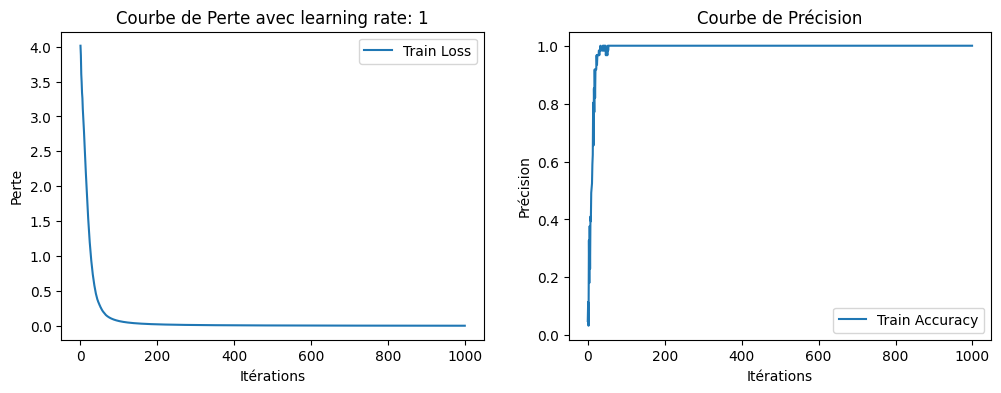

train acc : 1.0 loss : 0.002812901961504153


In [39]:
history_test , activations_test, parametres_test , gradients_test = deep_neural_network(X_test, y_test, hidden_layers=(256,256), learning_rate=1, n_iter=1000)

In [40]:
acc = test_accuracy_and_loss(X_test , y_test , parametres)

Test Accuracy: 1.0000
Test Log Loss: 0.0116


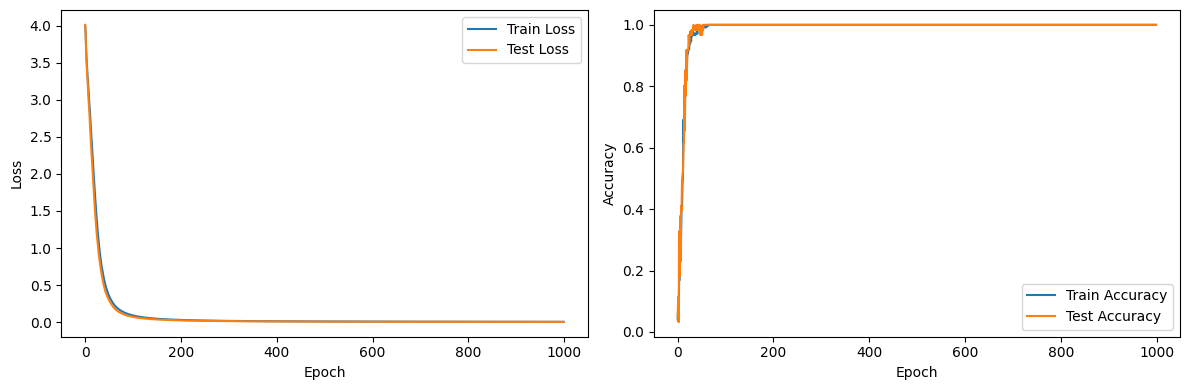

In [41]:
# Plot training and test loss/accuracy curves

plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_train[:, 0], label='Train Loss')
plt.plot(history_test[:, 0], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_train[:, 1], label='Train Accuracy')
plt.plot(history_test[:, 1], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Sauvegarde du Modèle

In [ ]:
import pickle

# Sauvegarder les paramètres du modèle dans un fichier
with open('ressource/mlp_parametres.pkl', 'wb') as f:
    pickle.dump(parametres, f)
with open("ressource/encoder.pkl", "wb") as f:
    pickle.dump(onehot_encoder, f)

In [ ]:
import json

# Extraire les noms de classes directement
disease_labels = list(onehot_encoder.categories_[0])

# Sauvegarder dans un fichier JSON
with open("ressource/disease_labels.json", "w", encoding="utf-8") as f:
    json.dump(disease_labels, f, ensure_ascii=False, indent=2)



In [ ]:
symptom_names = preprocessed_df.drop(columns=["Diseases"]).columns.tolist()
with open("ressource/symptoms.json", "w", encoding="utf-8") as f:
    json.dump(symptom_names, f, ensure_ascii=False, indent=2)
